## PCA - Pima Indian Diabetes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
pima = pd.read_csv('../01.소개/pima-indians-diabetes.csv', skiprows=9, header=None)
pima.columns = ['P', 'G', 'BP', 'S', 'I', 'BMI', 'D', 'Age', 'Target']
pima.head()

,P,G,BP,S,I,BMI,D,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
from sklearn.preprocessing import StandardScaler
pima_std = StandardScaler().fit_transform(pima.iloc[:, :-1].values)
pima_std.shape

(768, 8)

#### 2. 주성분 분석

In [6]:
from sklearn.decomposition import PCA

In [7]:
# 2차원으로 축소
pca2 = PCA(n_components=2)
pima_pca2 = pca2.fit_transform(pima_std)
sum(pca2.explained_variance_ratio_)

0.4781987607385661

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [9]:
# 원본 데이터의 성능
X_train, X_test, y_train, y_test = train_test_split(
    pima_std, pima.Target.values, stratify=pima.Target.values, test_size=0.2, random_state=2023
)
lr = LogisticRegression(random_state=2023)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7987012987012987

In [10]:
def pca_accuracy(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=2023
    )
    lr = LogisticRegression(random_state=2023)
    lr.fit(X_train, y_train)
    return lr.score(X_test, y_test)

In [11]:
for n in [2,3,4,5]:
    pca = PCA(n_components=n)
    pima_pca = pca.fit_transform(pima_std)
    explained = sum(pca.explained_variance_ratio_)
    accuracy = pca_accuracy(pima_pca, pima.Target.values)
    print(f'PCA{n}: 설명력-{explained:.4f}, 정확도-{accuracy:.4f}')

PCA2: 설명력-0.4782, 정확도-0.7338
PCA3: 설명력-0.6069, 정확도-0.7338
PCA4: 설명력-0.7163, 정확도-0.7468
PCA5: 설명력-0.8116, 정확도-0.7273


#### 3. 시각화

In [12]:
df = pd.DataFrame(pima_pca2, columns=['PC1','PC2'])
df['target'] = pima.Target.values
df.head(3)

,PC1,PC2,target
0,1.068503,1.234895,1
1,-1.121683,-0.733852,0
2,-0.396477,1.595876,1


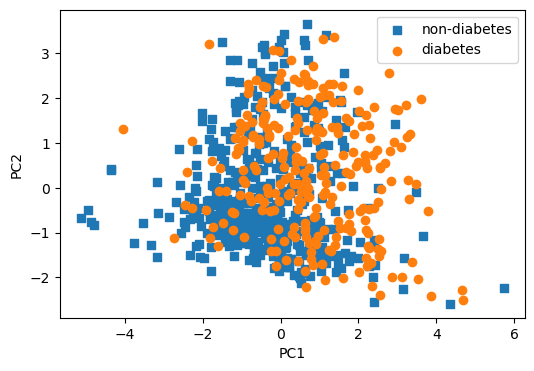

In [14]:
markers = ['s','o']
plt.figure(figsize=(6,4))
for i, marker in enumerate(markers):
    x_data = df[df.target == i]['PC1']
    y_data = df[df.target == i]['PC2']
    plt.scatter(x_data, y_data, marker=marker, label='diabetes' if i == 1 else 'non-diabetes')
plt.legend()
plt.xlabel('PC1'), plt.ylabel('PC2')
plt.show()